In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.ops.missing import dispatch_fill_zeros


In [4]:
df = pd.read_csv('data/billionaires_statistics_dataset.csv')
df.drop(['title', 'state', 'residenceStateRegion', 'organization'], axis=1, inplace=True)
df['gdp_country'] = df['gdp_country'].replace('[$,]', '', regex=True).astype(float)


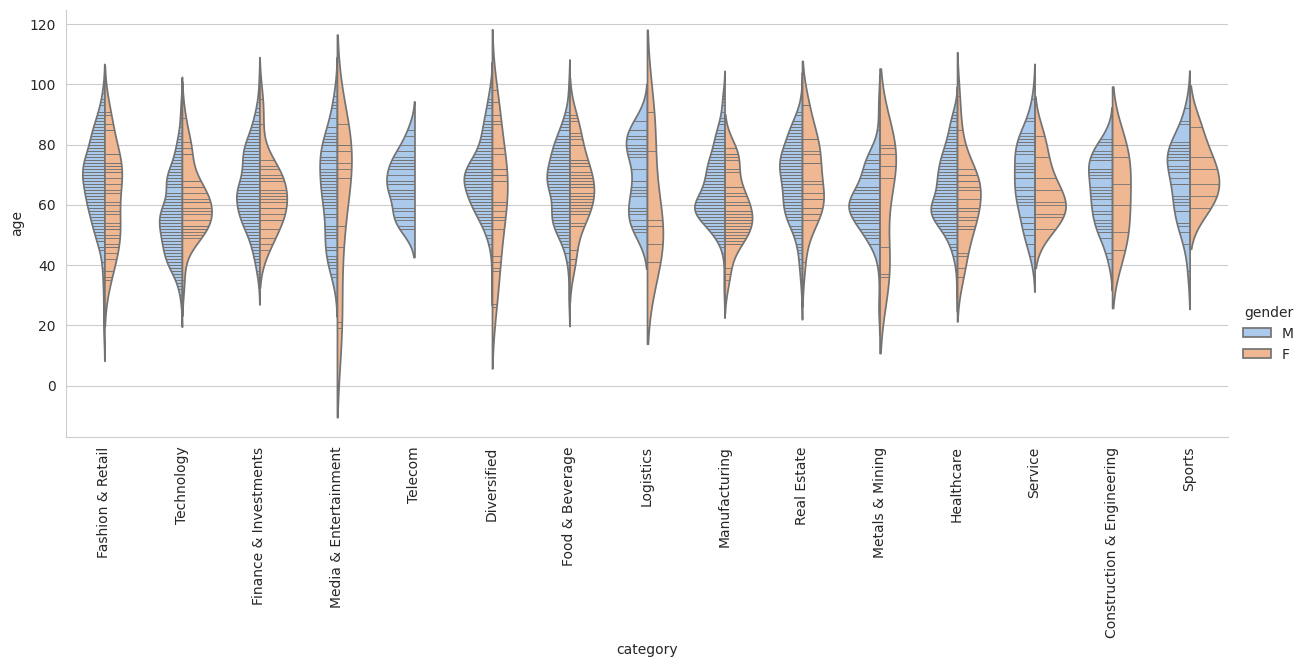

In [12]:
# We get rid of these categories because the plot would get too junky and their behaviour is not out of ordinary.
df_filtered = df.query("category not in ['Gambling & Casinos', 'Energy', 'Automotive']")
sns.catplot(data=df_filtered, x='category', y='age', kind='violin', hue='gender', inner="stick", aspect=2.5, split=True, palette='pastel')

plt.xticks(rotation=90)
plt.show()

As we can see from the violin plot above, distribution of age with respect to the category has its quirks. Namely, we can see that in most cases the range is wider for women - especially in "media & entertainment" category - I suppose it is easier for a female musician or actress to become a billionaire. Telecom is an odd case, because we have no female billionaires in this industry in our dataset. Other than that, the distribution of age values is resembling a normal distribution, with except of "Logistics", but it is probably because there is too few records for the Gaussian pattern to form. *We have to account for the kernel density estimator, which smoothes out the plot - to the point where some billionaire supposedly have below 0 years. We know it's not true, as I will show with the box plot below.*

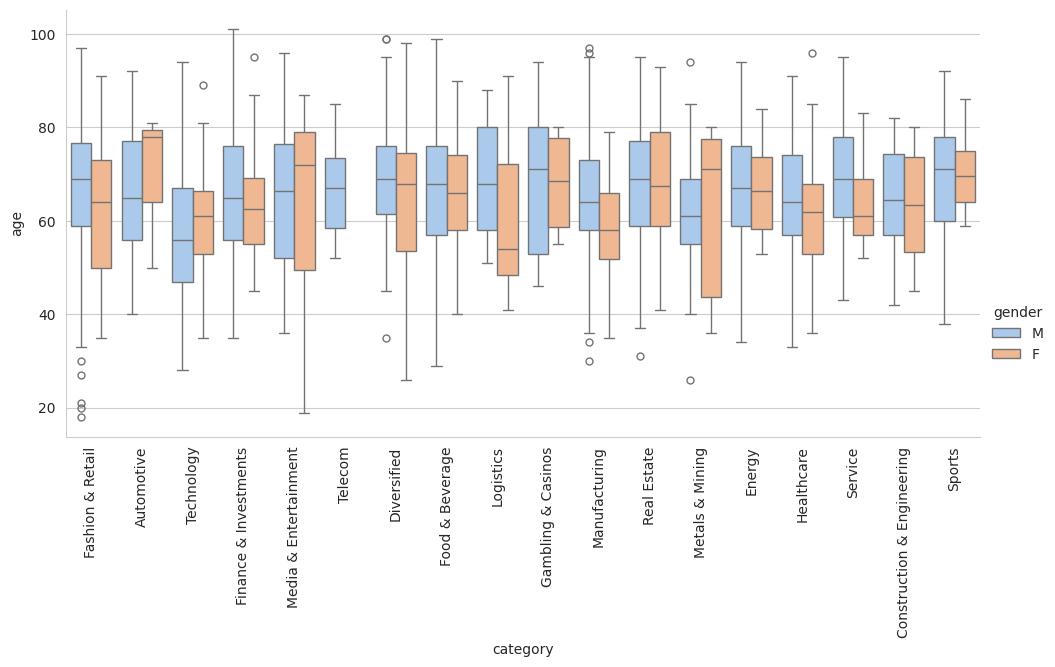

In [16]:
sns.catplot(data=df, x='category', y='age', kind='box', aspect=2, hue='gender', palette='pastel')

plt.xticks(rotation=90)
plt.show()

We can see that in most categories the whiskers are fairly long, which suggests that . We can see that the median is higher for men in almost every category, which pairs up well with the fact that most of woman billionaires are not self-made - I might assume they are younger wifes of deceased billionaires that inherited the wealth.

Below, we can see that the population is condensed close to the lower bound (a few billions) and has many outliers. The female population is more dispersed overall, and they are spaced out more evenly.

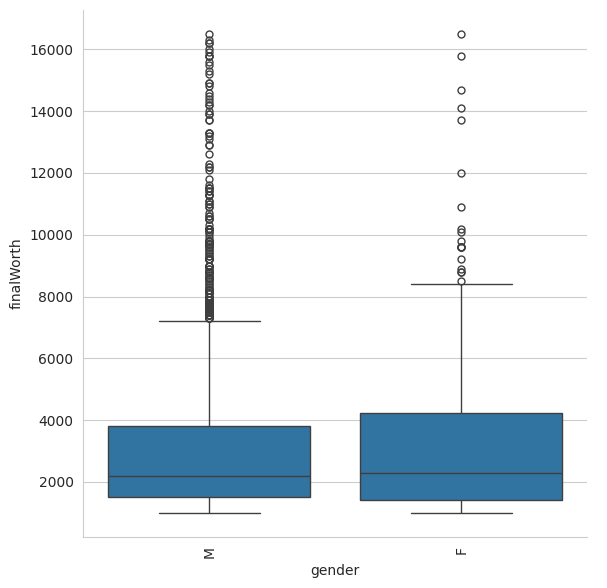

In [25]:
df_filtered = df.query('rank > 100')
sns.catplot(data=df_filtered, x='gender', y='finalWorth', kind='box', height=6)
plt.xticks(rotation=90)
plt.show()

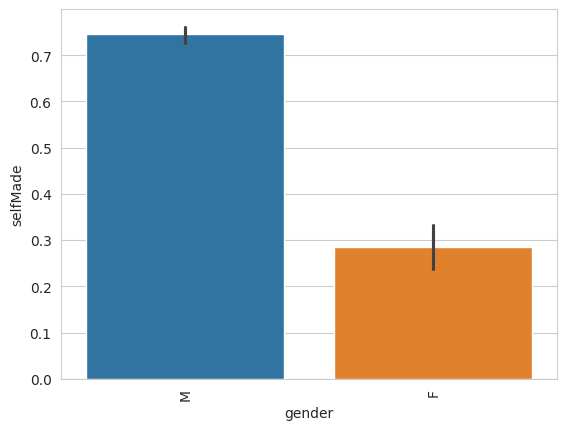

In [31]:
sns.barplot(data=df, x='gender', y='selfMade', hue='gender')
plt.xticks(rotation=90)
plt.show()

We can also see that above 70% of men are self-made billionaires, while it's only slightly below 30% for women.

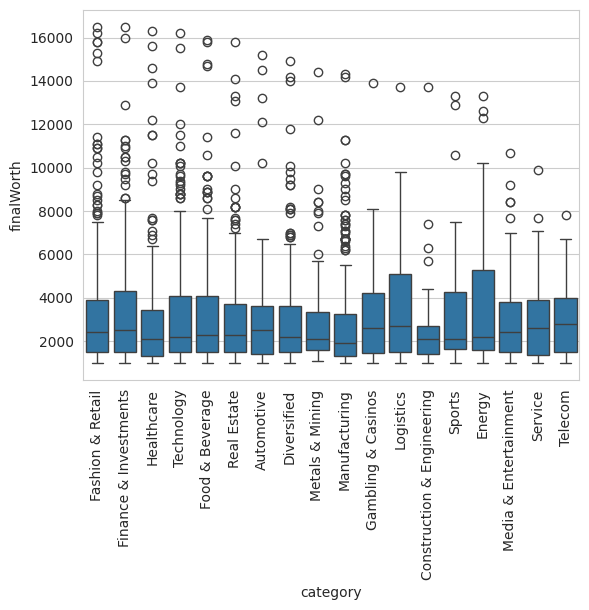

In [42]:
sns.boxplot(data=df.query('rank > 100'), x='category', y='finalWorth')
plt.xticks(rotation=90)
plt.show()

We can see that even if we get rid of the biggest outliers, there still is many, so the outside quantiles are very dispersed in most categories.

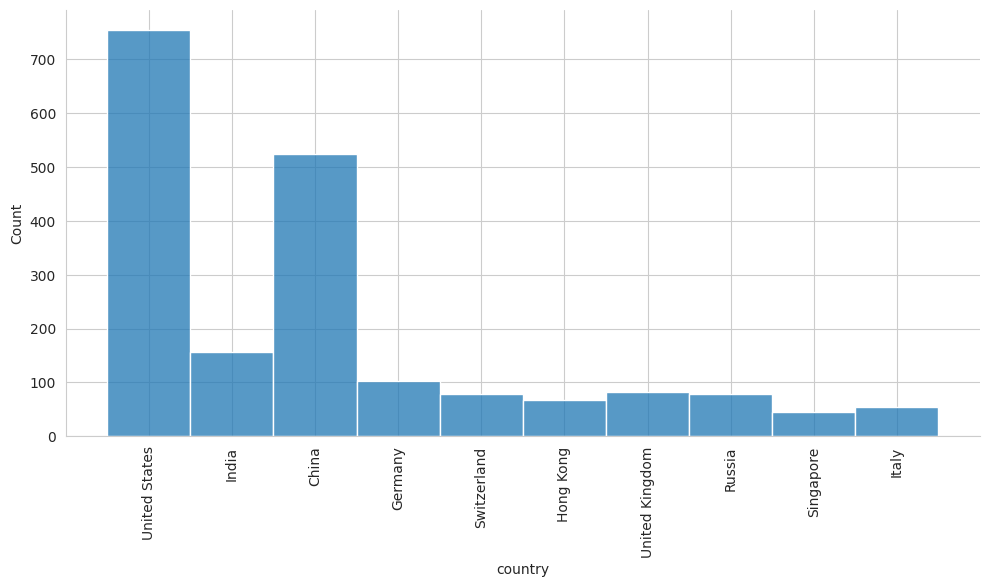

In [49]:
top10_countries = df['country'].value_counts().sort_values(ascending=False).nlargest(10).index
_df = df[df['country'].isin(top10_countries)]
sns.displot(_df, x='country', aspect=2)
plt.xticks(rotation=90)
plt.show()

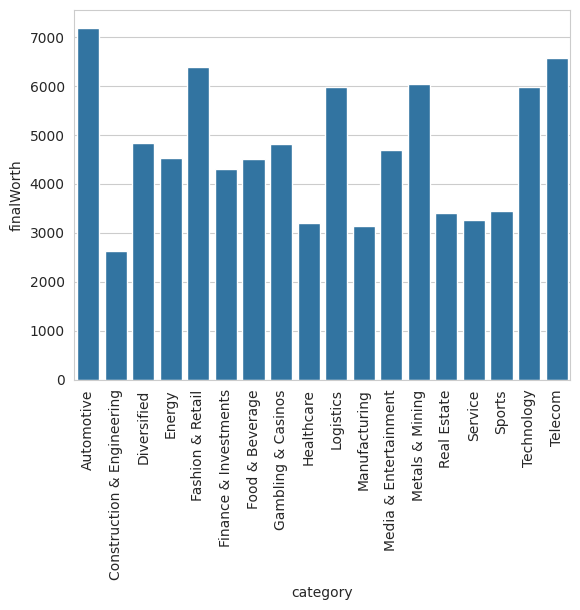

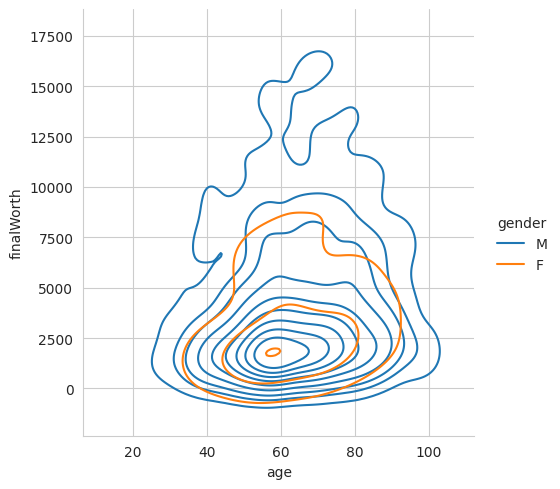

In [64]:
sns.displot(_df.query('rank > 100'), x='age', y='finalWorth', hue='gender', kind='kde')

<Axes: >

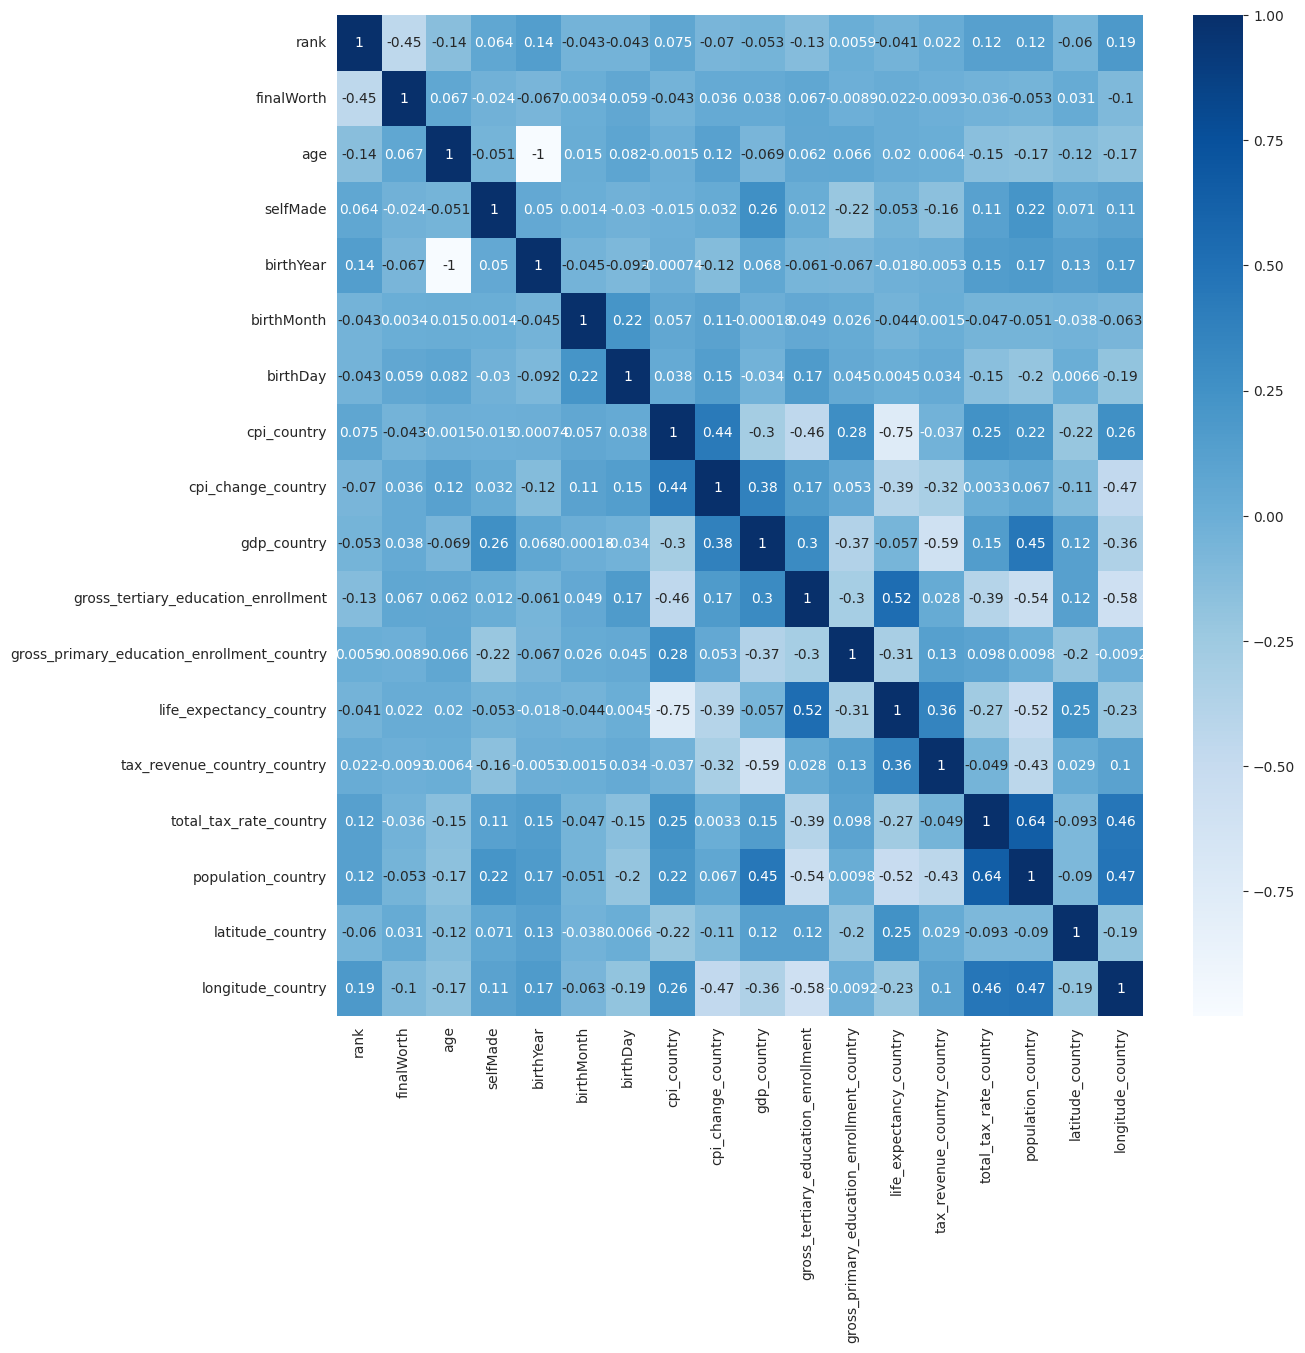

In [94]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(13, 13))
sns.heatmap(corr, annot=True, cmap='Blues')

From the heatmap above we can see that there is not many strongly correlated value. Unfortunately the finalWorth column does not correlate with any of other values, which may imply that answering to the question: "will a specimen with prospect of being a billionaire become extraordinarily rich even in comparison to other billionaires?" is a hard task with just this dataset. Furthermore, it seems that either the sample of the population is too small or it just depends on one's luck.

There is a slight correlation between finalWorth and birthYear, which just means older people are richer - most billionaires accumulate money throughout their lifes, so it makes sense. Now, series with the strongest correlation with each other are related to GDP, CPI, tax_rate and population.

CPI, Consumer Price Index measures the monthly change in prices paid by consumers. It has a strong inverse correlation with life expectancy, as does the gross tertiary education enrollment (whether people go to college or equivalent)